In [380]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, auc, RocCurveDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

# Data Importation

In [382]:
#Importing Data set
energy=pd.read_csv(r"C:\Users\Vithushan\OneDrive\Desktop\Project Final - Electrical energy consumption\Raw Data\Steel_industry_data.csv")
energy

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


# Exploratory Data Analysis (EDA)

In [383]:
#Checking for the Missing Values / Find the Null values
energy.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [384]:
#Checking for the data types
energy.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [385]:
#Basic information
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [386]:
#Describing the Data
energy.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [387]:
energy.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

<AxesSubplot:ylabel='CO2(tCO2)'>

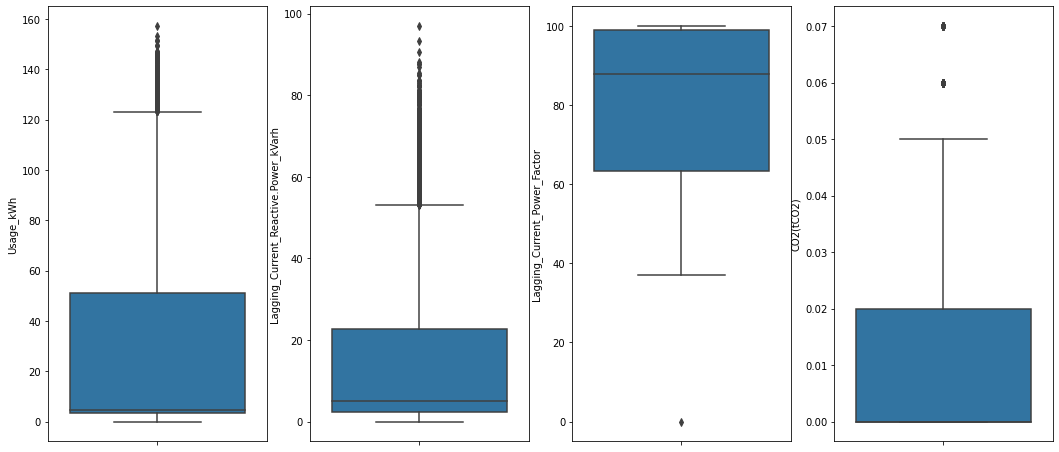

In [388]:
#Creating Boxplots to analyse the outliers in the dataset or not
f, axes = plt.subplots(1, 4, figsize=(18, 8), sharex=True)
sns.boxplot(data=energy, y="Usage_kWh", ax=axes[0])
sns.boxplot(data=energy, y='Lagging_Current_Reactive.Power_kVarh', ax=axes[1])
sns.boxplot(data=energy, y='Lagging_Current_Power_Factor', ax=axes[2])
sns.boxplot(data=energy, y='CO2(tCO2)', ax=axes[3])


#### Droping the outliers from data frame

In [389]:
energy.drop(energy.loc[energy['CO2(tCO2)']>0.05].index,inplace=True)

In [390]:
energy.drop(energy.loc[energy['Lagging_Current_Power_Factor']<20].index,inplace=True)

#### Verify whether droping the outliers is effected or not

<AxesSubplot:ylabel='CO2(tCO2)'>

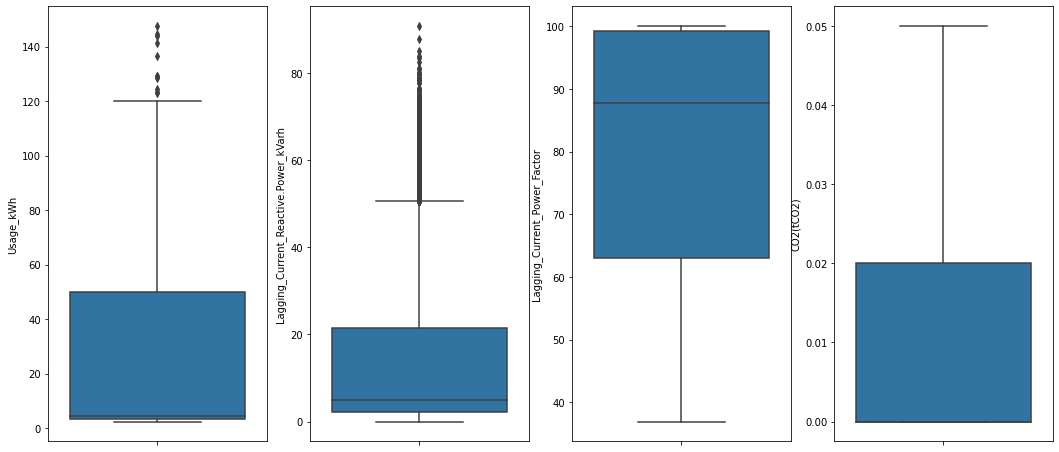

In [391]:
f, axes = plt.subplots(1, 4, figsize=(18, 8), sharex=True)
sns.boxplot(data=energy, y="Usage_kWh", ax=axes[0])
sns.boxplot(data=energy, y='Lagging_Current_Reactive.Power_kVarh', ax=axes[1])
sns.boxplot(data=energy, y='Lagging_Current_Power_Factor', ax=axes[2])
sns.boxplot(data=energy, y='CO2(tCO2)', ax=axes[3])

<AxesSubplot:>

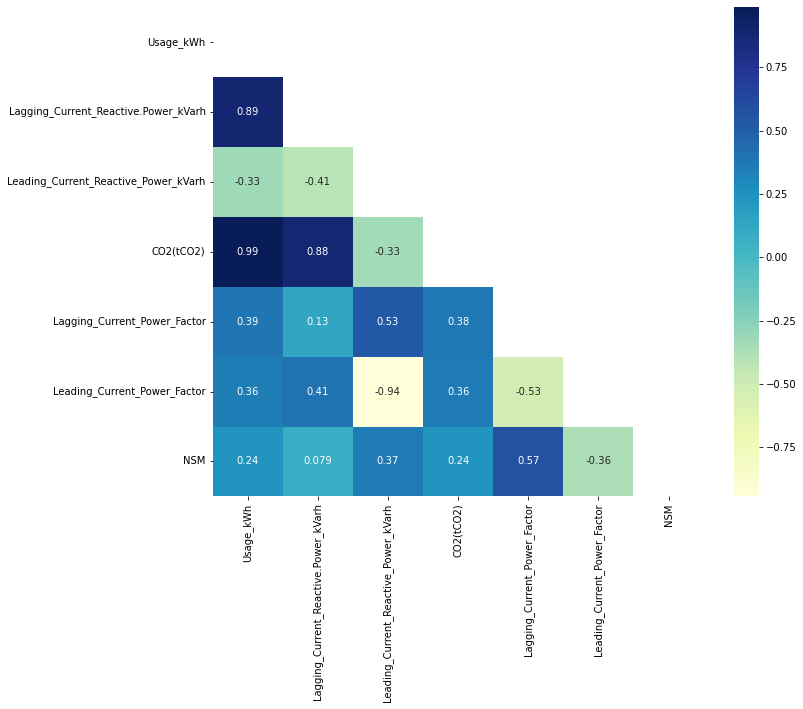

In [392]:
#Finding Correlations in between the columns in Dataset
corr = energy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(energy.corr(), mask=mask, cmap="YlGnBu", annot=True)

In [393]:
# Correlation Plot
corr

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.886594,-0.325037,0.986810,0.388933,0.355837,0.240083
Lagging_Current_Reactive.Power_kVarh,0.886594,1.000000,-0.409031,0.876509,0.133528,0.411997,0.079234
Leading_Current_Reactive_Power_kVarh,-0.325037,-0.409031,1.000000,-0.333419,0.532501,-0.943998,0.374568
CO2(tCO2),0.986810,0.876509,-0.333419,1.000000,0.382174,0.362744,0.236972
Lagging_Current_Power_Factor,0.388933,0.133528,0.532501,0.382174,1.000000,-0.526041,0.565577
Leading_Current_Power_Factor,0.355837,0.411997,-0.943998,0.362744,-0.526041,1.000000,-0.363641
NSM,0.240083,0.079234,0.374568,0.236972,0.565577,-0.363641,1.000000


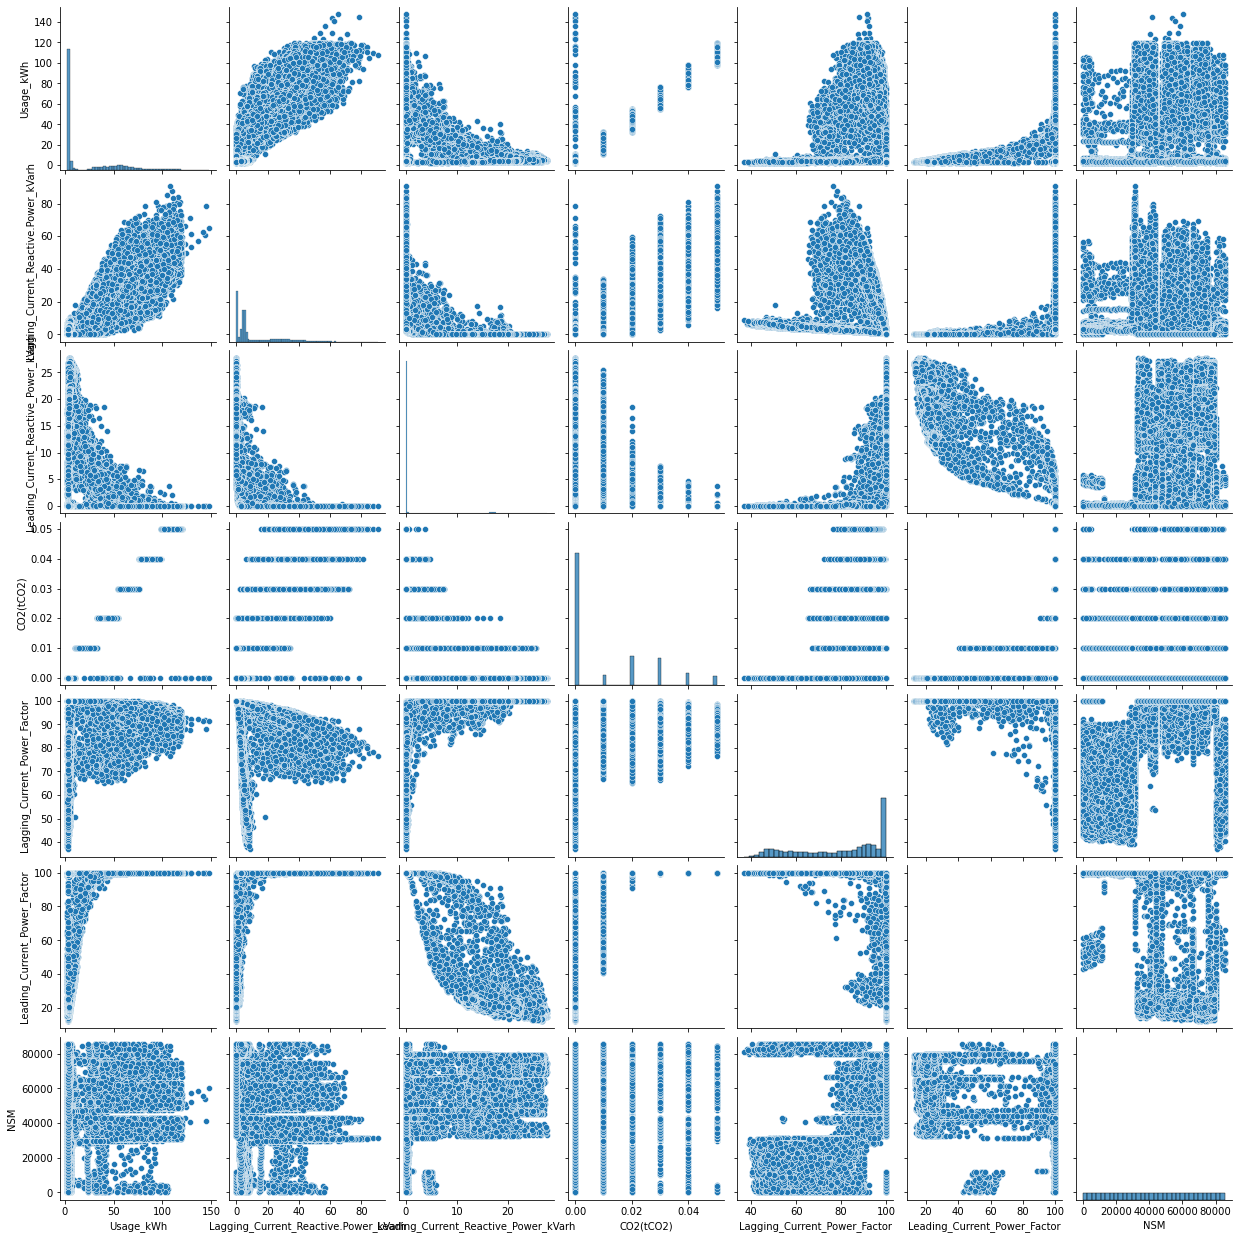

In [394]:
sns.pairplot(energy) 

In [395]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Load_Type','WeekStatus', 'Day_of_week'.
energy['Load_Type_encoded']= label_encoder.fit_transform(energy['Load_Type'])
energy['WeekStatus_encoded']= label_encoder.fit_transform(energy['WeekStatus'])
energy['Day_of_week_encoded']= label_encoder.fit_transform(energy['Day_of_week'])
  
print(energy['Load_Type_encoded'].unique())
print(energy['WeekStatus_encoded'].unique())
print(energy['Day_of_week_encoded'].unique())

[0 2 1]
[0 1]
[1 5 6 4 0 2 3]


In [396]:
energy.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Load_Type_encoded,WeekStatus_encoded,Day_of_week_encoded
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,0,1
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,0,1
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,0,0,1
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,0,0,1
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,0,0,1


In [397]:
energy.to_csv(r"C:\Users\Vithushan\OneDrive\Desktop\Project Final - Electrical energy consumption\Cleaned Data\energy_encoded_cleaned_data.csv")

In [191]:
energy.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Load_Type_encoded',
       'WeekStatus_encoded', 'Day_of_week_encoded'],
      dtype='object')

We Define x and y
I am not going to consider concentration of CO2 in air column ['CO2(tCO2)'] as because it is highly correlated with other columns

In [216]:
x= energy[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus_encoded', 'Day_of_week_encoded']]
y=energy[['Load_Type_encoded']]

In [217]:
print(x.shape)
print(y.shape)

(35040, 8)
(35040, 1)


# Hyperparameters tuning

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28032, 8)
(28032, 1)
(7008, 8)
(7008, 1)


In [275]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold()
skf.get_n_splits(x, y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [276]:
#To see how the hyper parameters splitted the data into train and test
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 6751  6752  6753 ... 35037 35038 35039] TEST: [   0    1    2 ... 7180 7181 7182]
TRAIN: [    0     1     2 ... 35037 35038 35039] TEST: [ 6751  6752  6753 ... 14115 14116 14117]
TRAIN: [    0     1     2 ... 35037 35038 35039] TEST: [13868 13869 13870 ... 21145 21146 21147]
TRAIN: [    0     1     2 ... 35037 35038 35039] TEST: [20894 20895 20896 ... 28175 28176 28177]
TRAIN: [    0     1     2 ... 28175 28176 28177] TEST: [27893 27894 27895 ... 35037 35038 35039]


# RidgeClassifier

Classifier using Ridge regression.

This classifier first converts the target values into {-1, 1} and then treats the problem as a regression task (multi-output regression in the multiclass case).

It is necessary to standarize data before using Ridge Classifier

In [277]:
x_stand = StandardScaler().fit_transform(x)
x_train_stand=StandardScaler().fit_transform(x_train)

GridSearchCV and RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

In [279]:
grid_search = GridSearchCV(RidgeClassifier(),
                           {  'alpha':np.arange(100,800,100),
                              'max_iter':np.arange(1,20,1),
                              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
                              'normalize' : [True, False]
                            },
                            cv=3, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train_stand,y_train)

Fitting 3 folds for each of 2128 candidates, totalling 6384 fits


GridSearchCV(cv=3, estimator=RidgeClassifier(), n_jobs=-1,
             param_grid={'alpha': array([100, 200, 300, 400, 500, 600, 700]),
                         'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [283]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 300, 'max_iter': 4, 'normalize': False, 'solver': 'saga'}
0.7480379566210046


In [284]:
rand_search = RandomizedSearchCV(RidgeClassifier(),
                           {  'alpha':np.arange(100,800,100),
                              'max_iter':np.arange(1,20,1),
                              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
                              'normalize' : [True, False]
                            }
                            ,cv=5, scoring="balanced_accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x_train_stand,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=-1,
                   param_distributions={'alpha': array([100, 200, 300, 400, 500, 600, 700]),
                                        'max_iter': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'normalize': [True, False],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga', 'lbfgs']},
                   scoring='balanced_accuracy', verbose=1)

In [285]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'solver': 'saga', 'normalize': False, 'max_iter': 9, 'alpha': 500}
0.6879848166101243


# RidgeClassifier - Model Testing

For this model through hyperparameter testing we established that optimal parameter are:

'alpha': 600,
'max_iter': 1,
'normalize': False,
'solver': 'saga'}

In [286]:
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(x_stand, y, test_size=0.2, random_state=5)
print(x_train_st.shape)
print(y_train_st.shape)
print(x_test_st.shape)
print(y_test_st.shape)

(28032, 8)
(28032, 1)
(7008, 8)
(7008, 1)


In [287]:
rc = RidgeClassifier(alpha=600, max_iter=1, normalize=False, solver='saga')
rc.fit(x_train_st, y_train_st)
y_pred_rc = rc.predict(x_test_st)


In [288]:
print("The accuracy of the RidgeClassifier is",accuracy_score(y_test, y_pred_rc)*100, "%")

The accuracy of the RidgeClassifier is 74.24372146118722 %


y_pred,0,1,2
y_initial,,,
0,3298,108,221
1,160,816,441
2,341,534,1089


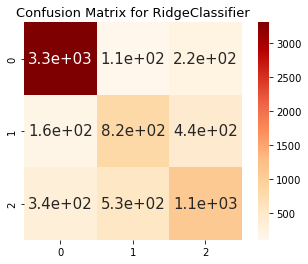

In [341]:
cm_model = confusion_matrix(y_test_st, y_pred_rc)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size':15}, square = True)
plt.title('Confusion Matrix for RidgeClassifier', size = 13)
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred_rc
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

In [317]:
print(f"Classification report for RidgeClassifier is")
print(classification_report(y_test_st, y_pred_rc))

Classification report for RidgeClassifier is
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      3627
           1       0.56      0.58      0.57      1417
           2       0.62      0.55      0.59      1964

    accuracy                           0.74      7008
   macro avg       0.68      0.68      0.68      7008
weighted avg       0.74      0.74      0.74      7008



# CategoricalNB Classifier

Naïve Bayes classifiers are a family of probabilistic classifiers based on Bayes Theorem with a strong assumption of independence between the features. These are not only fast and reliable but also simple and easiest classifier which is proving its stability in machine learning world. Despite its simplicity, it gives accurate prediction in text classification problems.

In [293]:
grid_search = GridSearchCV(CategoricalNB(),
                           {'alpha':np.arange(1,10,1),
                           'fit_prior' : [True, False],
                           'min_categories' : np.arange(1,10)
                           },
         cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=CategoricalNB(), n_jobs=-1,
             param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'fit_prior': [True, False],
                         'min_categories': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy', verbose=1)

In [294]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1, 'fit_prior': True, 'min_categories': 1}
nan


In [295]:
rand_search = RandomizedSearchCV(CategoricalNB(),
                           {'alpha':np.arange(100,800,100),
                           'fit_prior' : [True, False],
                           'min_categories' : np.arange(1,10)
                           },
        cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=CategoricalNB(), n_jobs=-1,
                   param_distributions={'alpha': array([100, 200, 300, 400, 500, 600, 700]),
                                        'fit_prior': [True, False],
                                        'min_categories': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='accuracy', verbose=1)

In [296]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'min_categories': 8, 'fit_prior': True, 'alpha': 200}
nan


## CategoricalNB - Model Testing

The best parameters after hyperparameters tuning are:

'alpha': 1,
'fit_prior': True,
'min_categories': 1

In [308]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28032, 8)
(28032, 1)
(7008, 8)
(7008, 1)


In [309]:
from sklearn.naive_bayes import CategoricalNB
CNB = CategoricalNB(min_categories=1,alpha=1, fit_prior=True)
CNB.fit(x_train, y_train)
y_pred_cnb=CNB.predict(x_test)

In [310]:
print("The accuracy of the CategoricalNB is",accuracy_score(y_test, y_pred_cnb)*100, "%")

The accuracy of the CategoricalNB is 81.0074200913242 %


y_pred,0,1,2
y_initial,,,
0,3270,78,279
1,59,1178,180
2,185,550,1229


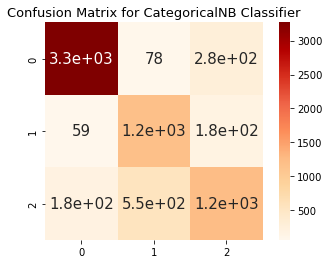

In [340]:
cm_model = confusion_matrix(y_test, y_pred_cnb)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size':15}, square = True)
plt.title('Confusion Matrix for CategoricalNB Classifier', size = 13)
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred_cnb
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

In [312]:
print(f"Classification report for CategoricalNB is")
print(classification_report(y_test, y_pred_cnb))

Classification report for CategoricalNB is
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3627
           1       0.65      0.83      0.73      1417
           2       0.73      0.63      0.67      1964

    accuracy                           0.81      7008
   macro avg       0.77      0.79      0.77      7008
weighted avg       0.82      0.81      0.81      7008



# Extra Trees Classifier

In [313]:
grid_search = GridSearchCV(ExtraTreesClassifier(),
                           {
                              'n_estimators':np.arange(200,250,5),
                              'max_depth': np.arange(1,20,2),
                              'criterion' : ["gini"],
                              'class_weight': ['balanced_subsample']
                            },cv=3, scoring="accuracy",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['gini'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'n_estimators': array([200, 205, 210, 215, 220, 225, 230, 235, 240, 245])},
             scoring='accuracy', verbose=1)

In [303]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 19, 'n_estimators': 225}
0.8914454908675798


In [305]:
rand_search = RandomizedSearchCV(ExtraTreesClassifier(),
                           {
                              'n_estimators':np.arange(200,250,5),
                              'max_depth': np.arange(1,20,2),
                              'criterion' : ["gini"],
                              'class_weight': ['balanced_subsample']
                            
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced_subsample'],
                                        'criterion': ['gini'],
                                        'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([200, 205, 210, 215, 220, 225, 230, 235, 240, 245])},
                   scoring='accuracy', verbose=1)

In [306]:
print(rand_search.best_params_)
print(rand_search.best_score_)

{'n_estimators': 240, 'max_depth': 19, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
0.8917307763644153


## Extra Trees Classifier - Model Testing

After hyperparameter tunning we know that the best parameters are:

'n_estimators': 240,
'max_depth': 19

In [330]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28032, 8)
(28032, 1)
(7008, 8)
(7008, 1)


In [331]:
etc = ExtraTreesClassifier(n_estimators=225,max_depth=19)
etc.fit(x_train, y_train)
y_pred_et = etc.predict(x_test)
acc_etc = etc.score(x_test, y_test)

In [332]:
print("The accuracy of the Extra Trees Classifier is",accuracy_score(y_test, y_pred_et)*100, "%")

The accuracy of the Extra Trees Classifier is 89.56906392694064 %


y_pred,0,1,2
y_initial,,,
0,3541,4,82
1,33,1170,214
2,101,297,1566


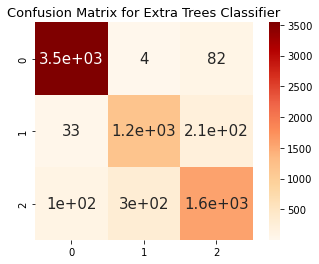

In [339]:
cm_model = confusion_matrix(y_test, y_pred_et)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size':15}, square = True)
plt.title('Confusion Matrix for Extra Trees Classifier', size = 13)
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred_et
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

#### Analysis with Tpot to findout the best model

In [354]:
import tpot
from tpot import TPOTClassifier
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

In [355]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [356]:
model = TPOTClassifier(generations=5,config_dict='TPOT light', population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1)

In [357]:
model.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8959996922664039

Generation 2 - Current best internal CV score: 0.8959996922664039

Generation 3 - Current best internal CV score: 0.8959996922664039

Generation 4 - Current best internal CV score: 0.8959996922664039

Generation 5 - Current best internal CV score: 0.8959996922664039

Best pipeline: DecisionTreeClassifier(BernoulliNB(input_matrix, alpha=0.01, fit_prior=True), criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=14)


TPOTClassifier(config_dict='TPOT light',
               cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
               generations=5, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

## DecisionTreeClassifier - Model Testing

In [358]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(28032, 8)
(28032, 1)
(7008, 8)
(7008, 1)


In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

In [367]:
DTC = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=14)
DTC.fit(x_train, y_train)
y_pred_DTC = etc.predict(x_test)

In [369]:
print("The accuracy of the Decision Tree Classifier is",accuracy_score(y_test, y_pred_DTC)*100, "%")

The accuracy of the Decision Tree Classifier is 89.56906392694064 %


y_pred,0,1,2
y_initial,,,
0,3541,4,82
1,33,1170,214
2,101,297,1566


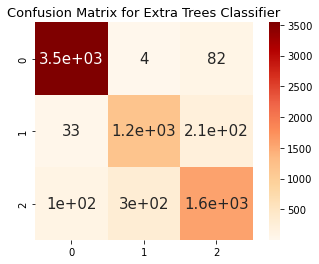

In [370]:
cm_model = confusion_matrix(y_test, y_pred_DTC)

plt.figure(figsize = (6, 4))
sns.heatmap(cm_model, annot = True, cmap = 'OrRd', annot_kws = {'size':15}, square = True)
plt.title('Confusion Matrix for Extra Trees Classifier', size = 13)
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred_DTC
pd.crosstab(x_test["y_initial"],x_test["y_pred"])